In [4]:
import numpy as np

In [69]:
## Initialize random data (A matrix)
m = 1000 # number of examples
d = 1000 # dim of example
k = 50 # number of output classes
# Data init
A = np.random.normal(0,1,size=(m,d)) # (# examples, dim examples)
# Param init
X = np.random.normal(0,1,size=(d,k)) # (dim examples, # classes)
E = np.random.normal(0,1,size=(m,k)) 
# Generate target classes
#b_i = np.random.randint(1, k+1, size=(m,1))
#b_i_zeroidx = b_i - 1
I_k = np.eye(k)

# This is a kinda strange way of generating data
b = np.dot(A,X) + E # (m,k)
b_i = b.argmax(axis=1) # zero indexed!
b_onehot = I_k[b_i]

In [40]:
b.argmax(axis=1)

array([20, 46, 18, 31,  3, 32, 27, 41, 30, 30,  4, 47, 12, 37, 42, 27, 44,
       44,  8,  7, 19,  7, 43, 43, 30, 36,  3, 48, 20, 34, 22, 18, 14,  0,
       11, 48, 43,  8, 26, 42, 10,  5,  7, 28,  6, 47, 17,  5, 11, 27, 49,
       35,  8, 30, 11, 25, 18, 38,  4, 29, 34, 18, 39, 28,  3, 28, 47, 27,
        2, 34, 22, 34, 25,  0, 12,  4, 21,  1,  4, 17, 48, 24,  0, 29,  1,
       29, 11, 10, 26, 44, 49,  1, 44, 31, 27, 18, 12,  7, 43, 35,  4, 14,
       36, 10, 17, 46, 36,  8, 44,  6,  2,  3, 15, 42,  8,  3, 41,  3,  4,
       47, 31, 48, 38, 39, 49, 18,  8,  9, 45, 49, 31, 34, 19, 49,  3, 31,
       47, 46, 29, 42, 32, 14,  1, 29, 22, 28, 14, 19,  7, 19, 49, 21, 32,
       19, 46, 33, 13, 11, 23, 19,  7, 45, 27, 19, 22,  6, 42,  5, 45, 26,
       40, 18, 14, 22, 30, 39, 14, 13,  4, 49, 35, 19, 18, 32,  7,  0, 10,
       46, 39,  3, 30, 20,  3,  2, 21, 11, 11, 26, 22,  3, 32, 28, 22,  0,
       23, 27, 38, 11, 35, 19, 36, 30, 38, 19, 38,  4, 19, 42, 46, 25,  4,
       30, 38, 32,  9, 42

In [64]:
from scipy.special import softmax
def grad(A, Y, X):
    Z = - A @ X
    probs = softmax(Z, axis=1)
    m = A.shape[0]
    grad_X = 1/m * (A.T @ (Y - probs))
    return grad_X
def loss(A, Y, X):
    Z = - A @ X
    N = A.shape[0]
    loss = 1/N * (np.trace(A @ X @ Y.T) + np.sum(np.log(np.sum(np.exp(Z), axis=1))))
    return loss

In [65]:
import pandas as pd
#from sklearn.preprocessing import OneHotEncoder
#onehot_encoder = OneHotEncoder(sparse=False)
def gd(A, b_onehot, max_iter=1000, eta=0.1, X_0 = None):
    m,d = A.shape
    k = b_onehot.shape[1]
    X = np.zeros((d, k)) if X_0 is None else X_0
    loss_hist = []
 
    for i in range(max_iter):
        X -= eta * grad(A, b_onehot, X)
        loss_hist.append(loss(A, b_onehot, X))

    df = pd.DataFrame({'loss': loss_hist})
    return df, X

In [70]:
df, W = gd(A,b_onehot)

In [71]:
df

,loss
0,3.803324
1,3.695579
2,3.588834
3,3.483141
4,3.378556
...,...
995,0.012359
996,0.012346
997,0.012333
998,0.012320


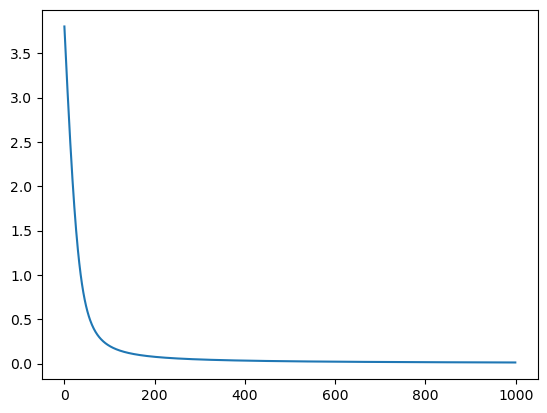

In [72]:
import matplotlib.pyplot as plt
plt.plot(df['loss'])